# Machine Learning - Practical 2

Names: Jakob Dieterle, Andre Buderus, Jonas Willms

In [157]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

# Task 1: The Data

We use the mouse protein expression dataset: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
Please use the code provided below for loading the dataset.

In [158]:
file = '/home/jonas/uni/ML/machinelearning22/Data_Cortex_Nuclear.csv'
df = pd.read_csv(file)

N = 10  # use only every tenth sample
X_all = df.iloc[::N,1:65].to_numpy()
t_all = (df['Behavior'] == 'S/C').to_numpy()[::N]

idx = ~np.any(np.isnan(X_all), axis=1)
X_all = X_all[idx]
t_all = t_all[idx]

In [159]:
display(df)

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

### Tasks 1.1: Dataset Exploration 

Let's start with a bit of exploration.

- How many samples / features are provided?
- How many labels does the dataset have?
- What is the value range of the individuals predictors?
- Visualize the 10 first samples of the dataset in a form that highlights their differences.
- Visualize the variance of each predictor.

Number of samples: 105
Number of features: 64
Number of labels: 2 with counts [52 53]
Value range of features: 0.060671111 to 7.464070214


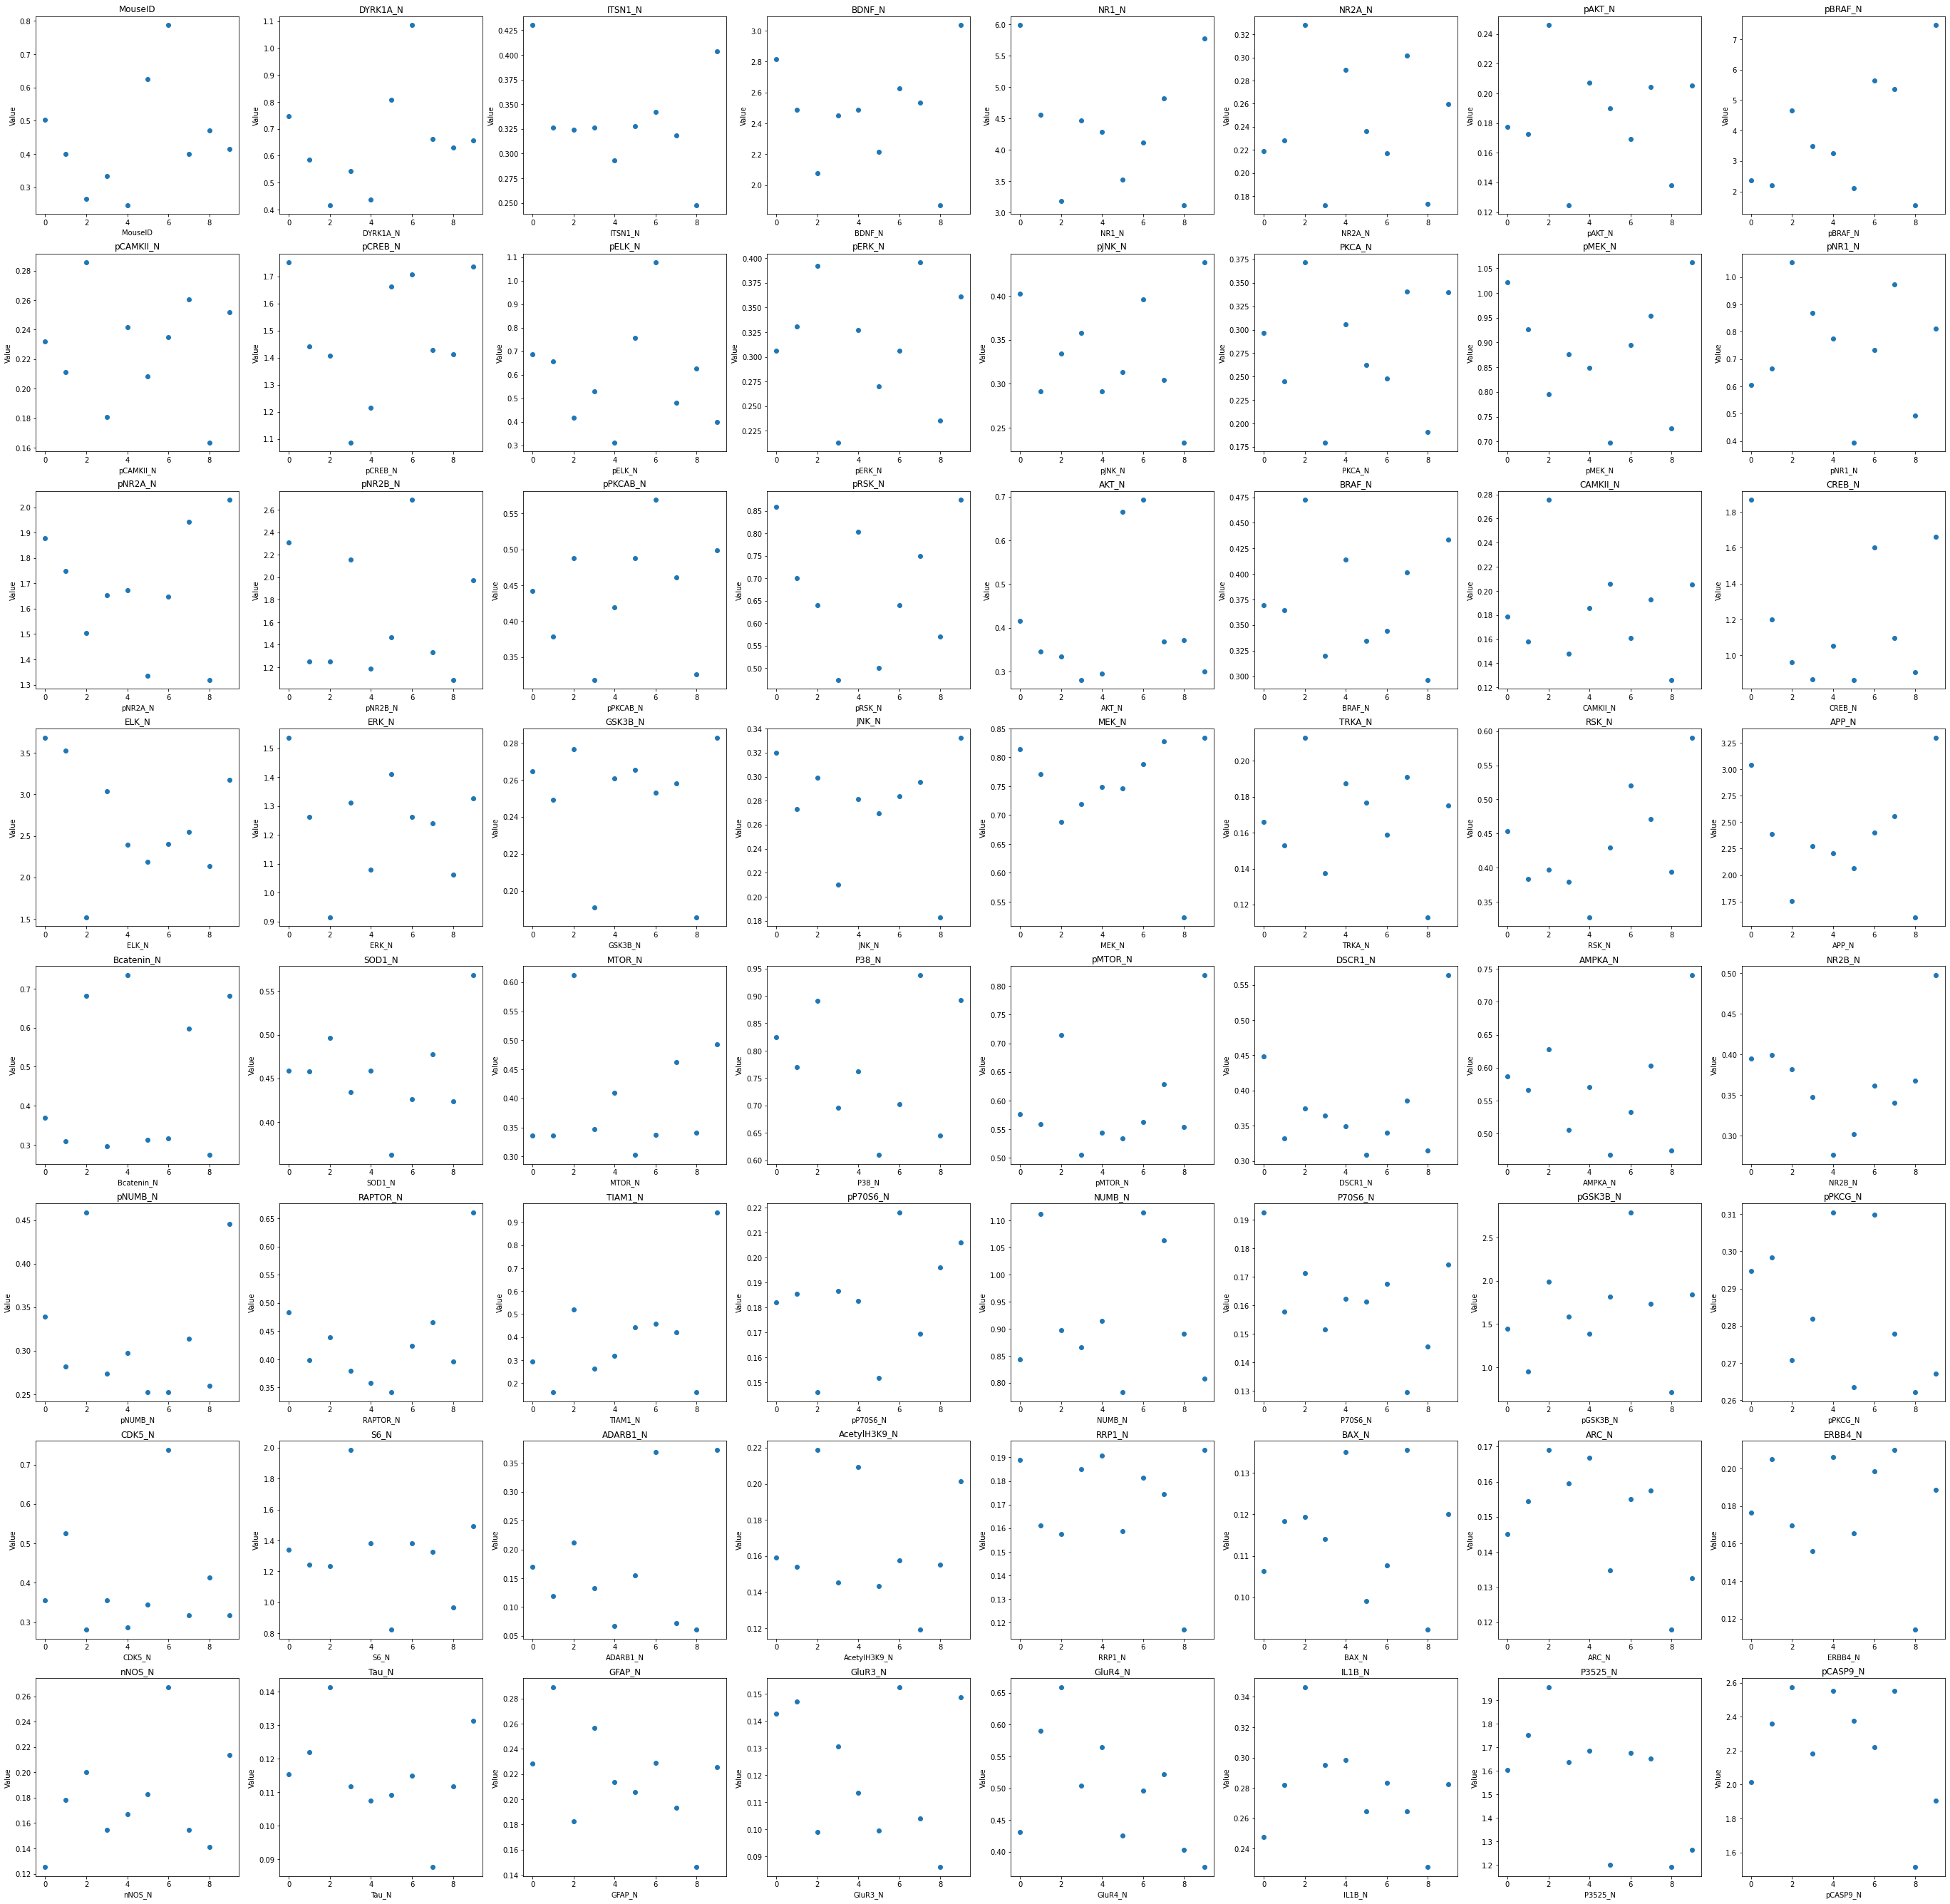

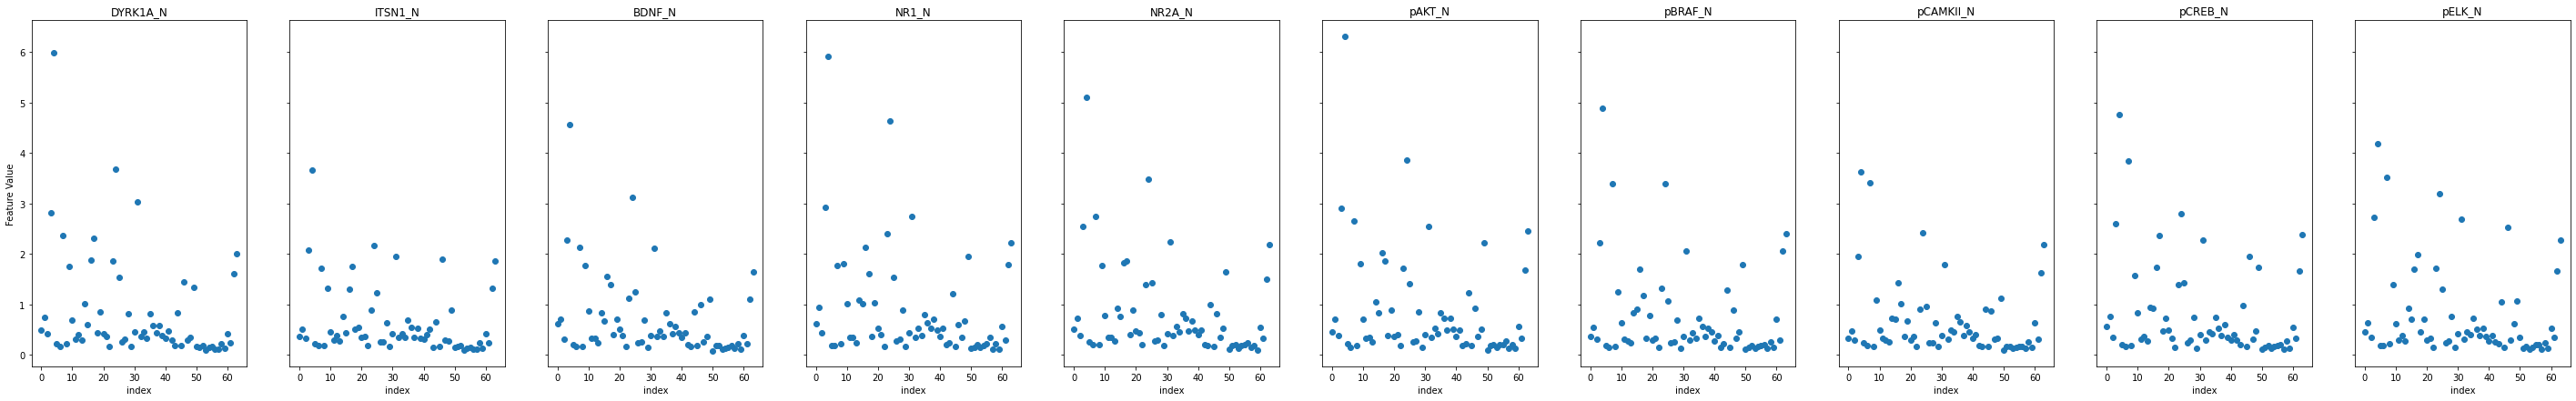

Text(0, 0.5, 'Variance')

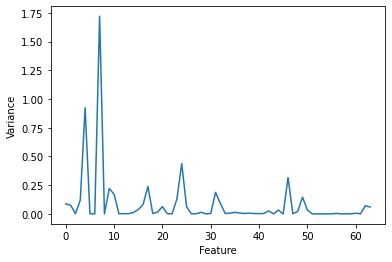

In [160]:
# data exploration
print(f"Number of samples: {X_all.shape[0]}")
print(f"Number of features: {X_all.shape[1]}")
labels, lc = np.unique(t_all, return_counts=True)
print(f"Number of labels: {len(lc)} with counts {lc}")
print(f"Value range of features: {np.min(X_all)} to {np.max(X_all)}")

rows = cols = 8
feature = 0
fig, axs = plt.subplots(rows, cols)
for i in range(0,rows):
    for j in range(0,cols):
        axs[i,j].scatter(range(10), X_all[::11,feature])
        axs[i,j].set_title(df.columns[feature])
        axs[i,j].set_xlabel(df.columns[feature])
        axs[i,j].set_ylabel("Value")
        feature += 1
fig.set_size_inches(48,48)
plt.show()

#also not sure what of those (over/under here) is wanted

labels = df.iloc[::1,1:65].columns #creating list with labels maybe not the smoothest way

fig, axs = plt.subplots(1,10,sharey=True, figsize=(50,7)) #streched y-axis to improve visibility of diffrences. Not sure if I like it. remove at will
axs[0].set_ylabel("Feature Value")
for i in range(10):
    axs[i].scatter(range(X_all.shape[1]), X_all[i])
    axs[i].set_title(labels[i])
    axs[i].set_xlabel("index")
#fig.set_size_inches(48,4)
plt.show()

plt.plot(np.var(X_all, axis=0))
plt.xlabel("Feature")
plt.ylabel("Variance")

**Task 1.2: Data Preprocessing**:  
- Write a function `split_data(X, y, frac, seed)` that first shuffles your training data and then splits it into a training and a test set. `frac` determines the relative size of the test dataset, `seed` makes sure we get reproducible 
results.  
- Write a function `preprocess(X)` which zero-centers your data and sets variance to one (per-feature).

In [161]:
def split_data(X, y, frac=0.3, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # ---------------- INSERT CODE ----------------------
    idx = np.arange(X.shape[0])
    idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

    test_idx = idx_shuffled[:int(X.shape[0]*frac)]
    train_idx = idx_shuffled[int(X.shape[0]*frac):X.shape[0]]

    X_test = X[test_idx]
    y_test = y[test_idx]
    print('Test set shapes (X and y)', X_test.shape, y_test.shape)

    X_train = X[train_idx]
    y_train = y[train_idx]
    print('Training set shapes (X and y):', X_train.shape, y_train.shape)

    # ---------------- END CODE -------------------------
    
    return X_train, X_test, y_train, y_test
    
    
def preprocess(X):

    # ---------------- INSERT CODE ----------------------
    m = len(X[0,:])
    d = X.copy()
    for i in range(m):
        d[:,i] = (d[:,i] - d[:,i].mean()) / d[:,i].std()

    # ---------------- END CODE -------------------------
    
    return d

# Task 2: LDA

First, use Linear Discriminant Analysis to separate the classes. As discussed in the Bishop in pg. 186-189, we can find a weight vector $\vec{w}$ that performs a projection of the i-th input data point $\vec{x}_i$

$p =   \vec{w}^T \vec{x}_i$

that optimally separates the classes.

Use the analytic solution to compute the optimal weights $\vec{w}$ from the training set data. 

### Task 2.1

1. Implement a function `compute_lda_weights(x, y)` manually, which carries out LDA using the data `x,y`. 
2. Apply this function on your training data.
3. Visualize the obtained weight vector $\vec{w}$ using a `plt.stemplot`.

Text(0.5, 0, 'predictors')

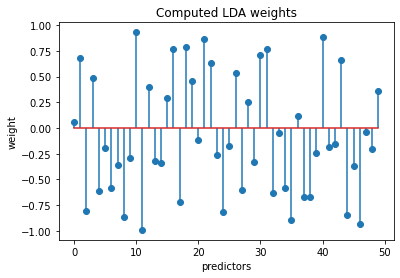

In [162]:
# example usage of stemplot
w_lda = np.random.uniform(-1, 1, 50)  # example data
plt.stem(w_lda.flatten(), use_line_collection=True)
plt.title('Computed LDA weights')
plt.ylabel('weight')
plt.xlabel('predictors')

In [163]:
def compute_lda_weights(X, y, alpha=0.001):
    '''function that computes regularized LDA weights for a two class problem

    input:
        x: training data -- array with shape (n_examples x n_features)
        y: training data class label -- flat array with length (n_examples)
        alpha: regularization strength -- float

    output:
        m0: mean of the training examples of class 0 -- flat array with length (n_features)
        m1: mean of the training examples of class 1 -- flat array with length (n_features)
        mdiff: difference of the two class means -- flat array with length (n_features)
        w: regularized LDA weight vector -- flat array with length (n_features)
        '''

    # ---------------- INSERT CODE ----------------------

    length = X.shape[1]
    uniq_class = np.unique(y)

    m_list = []
    for i in uniq_class:
        m_list.append(np.array((X[y==i].mean(axis=0))))

    sw = np.zeros((length,length))
    for elem in zip(m_list,uniq_class):
        m_c , x_c = elem[0], X[y==elem[1]]
        sw += (x_c - m_c).T.dot((x_c - m_c))
    
    w = np.linalg.inv(sw).dot(m_list[1]-m_list[0])
    m0, m1, mdiff = m_list[0], m_list[1], m_list[1]- m_list[0]


    # ---------------- END CODE -------------------------

    return m0, m1, mdiff, w

In [164]:
# split dataset and apply LDA
X_train, X_test, t_train, t_test = split_data(X_all, t_all, seed=1)
m0, m1, mdiff, w_lda = compute_lda_weights(X_train, t_train)

Test set shapes (X and y) (31, 64) (31,)
Training set shapes (X and y): (74, 64) (74,)


Text(0.5, 0, 'predictors')

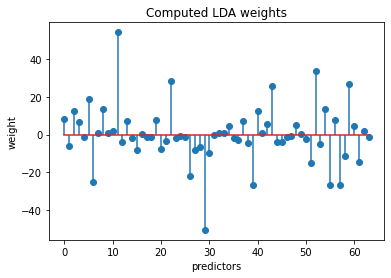

In [165]:
# visualize LDA weights using stemplot
plt.stem(w_lda.flatten(), use_line_collection=True)
plt.title('Computed LDA weights')
plt.ylabel('weight')
plt.xlabel('predictors')

### Task 2.2

Project the training data and the test data on $\vec{w}$. Visualize the class separation using a two-color histogram. 
- Is the class separation good? ->yes
- Is there a big difference between training and test data? -> not really

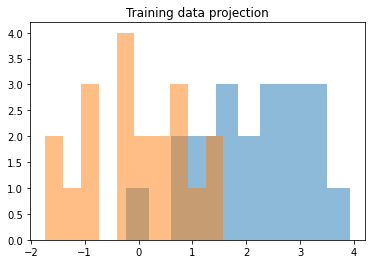

In [166]:
# example usage of histogram
a, b = np.random.normal(2, 1, 20), np.random.normal(0, 1, 20)  # example data

plt.title('Training data projection')
_ = plt.hist(a,label='class 0',alpha=0.5)
_ = plt.hist(b,label='class 1',alpha=0.5)

In [167]:
# compute projections for training and test data
p1_true = X_test[t_test].dot(w_lda.T)
p1_false = X_test[t_test==False].dot(w_lda.T)
p2_true = X_train[t_train].dot(w_lda.T)
p2_false = X_train[t_train==False].dot(w_lda.T)

(array([5., 3., 4., 5., 5., 1., 6., 2., 0., 1.]),
 array([-0.31304985, -0.22257739, -0.13210492, -0.04163245,  0.04884002,
         0.13931248,  0.22978495,  0.32025742,  0.41072989,  0.50120235,
         0.59167482]),
 <BarContainer object of 10 artists>)

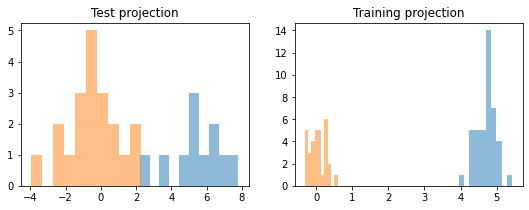

In [168]:
# visualize projections using histogram
fig, ax = plt.subplots(1,2, figsize=(9,3))
ax[0].set_title('Test projection')
ax[0].hist((p1_true),label='True',alpha=0.5)
ax[0].hist((p1_false),label='False',alpha=0.5)
ax[1].set_title('Training projection')
ax[1].hist((p2_true),label='True',alpha=0.5)
ax[1].hist((p2_false),label='False',alpha=0.5)

### Task 2.3

Now we make class predictions based on the projections. Read https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Fisher's_linear_discriminant and compute threshold $c$ for the projected values $p$ based on the training data. Print the value of $c$ and plot $c$ into the histograms of projected values you made before!

Use $c$ to assign class labels for training and test set. Determine the classification errors (in terms of accuracy) on both datasets and print them. 

In [169]:
def compute_threshold_LDA(m0, m1, w):
    '''Compute the optimal threshold for LDA .

    input:
        m0, m1: mean vectors of the two classes -- flat array with length (n_features)
        w: weight vector of LDA -- flat array with length (n_features)

    output:
        c: the optimal threshold for LDA 
    '''

    # ---------------- INSERT CODE ----------------------

    c = 1/2*w.dot(m1+m0)

    # ---------------- END CODE -------------------------
  
    return c


def score_LDA(x_proj, y, c):
    '''Compute the accuracy given a threshold.

    input:
        x_proj: projected data -- flat array with length (n_examples)    
        y: class labels -- flat array with length (n_examples)
        c: optimal threshold for LDA - scalar

    output:
        y_hat: class label predicitons of LDA model -- flat array with length (n_examples)
        acc: classification accuracy
    '''
    # ---------------- INSERT CODE ----------------------
    correct = 0
    for i,j in zip(x_proj, y):
        if (i > c and j == True) or (i <= c and j == False):
            correct +=1 
    acc = correct/len(y)
    
    y_hat = [1 if (x-c > 0) else 0 for x in x_proj]

    # ---------------- END CODE -------------------------
    
    return np.array(y_hat), acc

In [170]:
# compute optimal threshold
treshhold = compute_threshold_LDA(m0,m1,w_lda)
print(f"Treshhold = {treshhold}")

Treshhold = 2.378379995870027


In [171]:
# compute classification accuracy
p_train = X_train.dot(w_lda.T)
p_test = X_test.dot(w_lda.T)

y_hat_train, acc_train = score_LDA(p_train,t_train,treshhold)
y_hat_test, acc_test = score_LDA(p_test,t_test,treshhold)
print(f"Train accuracy = {acc_train}")
print(f"Test accuracy = {acc_test}")

print(y_hat_test == t_test)

Train accuracy = 1.0
Test accuracy = 0.967741935483871
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True]


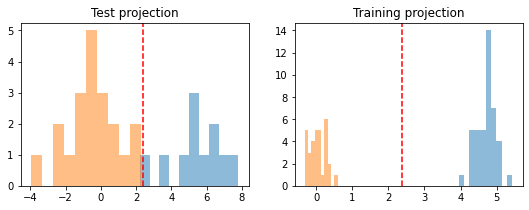

In [172]:
# visualize treshold in histogram
fig, ax = plt.subplots(1,2, figsize=(9,3))
ax[0].set_title('Test projection')
ax[0].hist((p1_true),label='True',alpha=0.5)
ax[0].hist((p1_false),label='False',alpha=0.5)
ax[0].axvline(treshhold, color = 'red', linestyle = '--' )
ax[1].set_title('Training projection')
ax[1].hist((p2_true),label='True',alpha=0.5)
ax[1].hist((p2_false),label='False',alpha=0.5)
ax[1].axvline(treshhold, color = 'red', linestyle = '--' )


## Task 3: Logistic Regression

Next, we will consider classification using Logistic Regression. 

For this task, we will use a different dataset:  
It consists of activations from a convolutional neural network (ResNet18) for images of cats and dogs.
The dataset contains 2,000 samples (i.e. CNN activations) and 256 features (i.e. the CNN activations have 256 dimensions). A target value of 0 indicates a cat, 1 a dog.

Below, you find all imports that are necessary.


In [173]:
X_all, t_all = pickle.load(open('cnn_features.pickle', 'rb'))

### Task 3.0: Normalize and split the data

Make sure the data has has zero mean and variance 1 per feature.

In [174]:
# normalize data
print(f"mean: {X_all.mean()} var: {X_all.var()}")
X_all = preprocess(X_all)
print(f"mean: {X_all.mean()} var: {X_all.var()}")

# split data
X_train, X_test, y_train, y_test = split_data(X_all, t_all)


mean: 0.025790512561798096 var: 0.31764087080955505
mean: -4.813075271670186e-09 var: 0.9999998211860657
Test set shapes (X and y) (600, 256) (600,)
Training set shapes (X and y): (1400, 256) (1400,)


### Task 3.1: Iterative Reweighted Least Squares**

1. Implement the IRLS algorithm and output at each iteration the current training accuracy. Remember the weight are updated according to:
$$ w' = w - ( \Phi^T R \Phi ) ^ {-1} \Phi^T (y - t)$$
where $y$ is the prediction, $t$ the ground truth target, $R$ the weighting matrix and $\Phi$ the design matrix.  

    Hints:  
    (a) There is a bias term in logistic regression  
    (b) Use a small value for weight init to avoid numerical problems.


2. Apply the IRLS algorithm on data and compute the test accuracy.
3. Compare the results of your implementation to the sklearn implementation of `LogisticRegression(penalty='none')`. Do you get the same result? -> almost

In [175]:
def y(X, w,b):
    x = X @ w + b
    return 1/(1 + np.exp(-x))

def R(y):
    R = np.identity(y.size)
    R = R*(y*(1-y))
    return R

def irls(X, t):
    w = np.zeros(X.shape[1])
    t = np.array(list(map(lambda x: 1 if x else 0, t)))
    lr = 0.01 # learning rate
    b = 0.1

    for i in range(3):
        y_ = y(X,w,b)
        w = w - np.linalg.inv(X.T @ R(y_) @ X) @ X.T @ (y_- t)
        b = b - lr * np.mean(y_ - t)
    return w

In [176]:
w = irls(X_train, y_train)

# compute accuracy
x0 = np.array(X_test[y_test==np.unique(y_test)[0]])
x1 = np.array(X_test[y_test==np.unique(y_test)[1]])
c = (w * 1/2).reshape(len(w),).dot(x0.mean(axis=0)+x1.mean(axis=0))
correct = len((x0.dot(w))[(x0.dot(w))<=c]) + len((x1.dot(w))[(x1.dot(w))>c])
score = correct/len(y_test)
print('Accuracy Testset: ',score)

Accuracy Testset:  0.91


In [177]:
 #sk learn
logReg = LogisticRegression(penalty='none')
logReg.fit(X_train, y_train)
#pred = logReg.predict(X_train)
logReg_score = logReg.score(X_test, y_test)
print(f"score on test set without penalty: {logReg_score}")


score on test set without penalty: 0.8866666666666667


### Task 3.2: Logistic Regression with Regularization

1. Set sklearn's penalty parameter to `l1` and `l2`. Use the range `np.linspace(0.02, 1, 25)` for the parameter `C`, which controls the strength of regularization. Where is the regularization strongest, for small or big `C`?  
Hint: For `l1` regularization you can use the `saga` solver.
-> C inverse regularization, therfore regularization is strongest for small c
2. Plot strength of regularization over accuracy. Does regularization improve the scores?
3. Visualize the coefficients (or just a subset of all coefficient for a better overview) of the regularized settings and the unregularized setting. What do you observe?
3. Compare the coefficients to the LDA weights.

In [183]:
#3.2.1
scoresl1 = [[],[],[]] #[[c][score logRegl1][logRegl1]]
scoresl2 = [[],[],[]] #[[c][score logRegl2][logRegl2]]
for c in np.linspace(0.02, 1, 25):
    logRegl1 = LogisticRegression(C = c, penalty='l1',  solver='liblinear')
    logRegl2 = LogisticRegression(C = c, penalty='l2',  solver='liblinear')

    logRegl1.fit(X_train, y_train)
    logRegl2.fit(X_train, y_train)

    scoresl1[0].append(c)
    scoresl1[1].append(logRegl1.score(X_test, y_test))
    scoresl1[2].append(logRegl1)

    scoresl2[0].append(c)
    scoresl2[1].append(logRegl2.score(X_test, y_test))
    scoresl2[2].append(logRegl2)

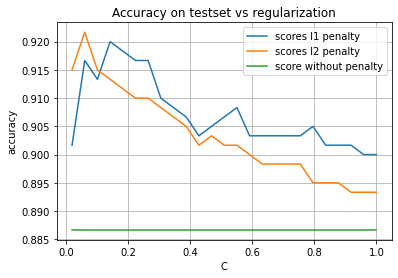

In [179]:
 #3.2.2 -- Plot accuracy vs regularization
plt.plot(scoresl1[0],scoresl1[1], label = "scores l1 penalty")
plt.plot(scoresl2[0],scoresl2[1], label = "scores l2 penalty")
plt.plot([x for x in np.linspace(0.02, 1, 25)], [logReg_score for x in np.linspace(0.02, 1, 25)], label = "score without penalty")
plt.title("Accuracy on testset vs regularization")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.grid()
plt.legend()

Text(0.5, 0.98, 'Subset of coefficients vs regularizations C')

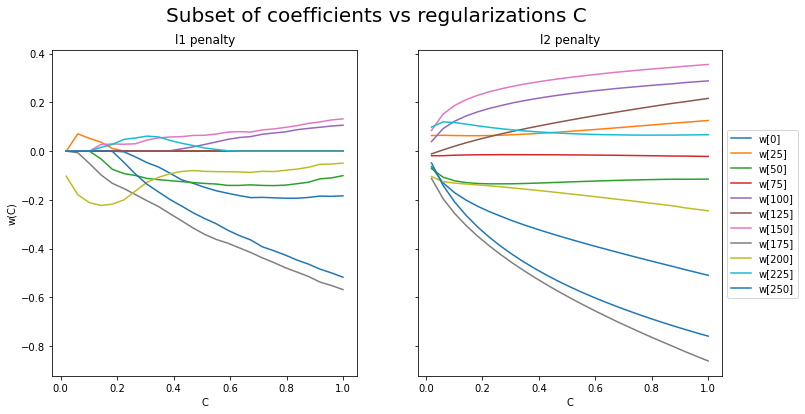

In [180]:
#3.2.3
w_none = logReg.coef_[0]



fig, axes = plt.subplots(1, 2,sharey=True,figsize=(12,6))
for idx in range(0,len(w_none),25):
    w_col = []
    for i,c in enumerate(scoresl1[0]):
        w_col.append(scoresl1[2][i].coef_[0][idx])

    axes[0].plot(scoresl1[0],w_col,label = f"w[{idx}]")

axes[0].set_xlabel("C")
axes[0].set_ylabel("w(C)")  
axes[0].set_title("l1 penalty")

for idx in range(0,len(w_none),25):
    w_col = []
    for i,c in enumerate(scoresl2[0]):
        w_col.append(scoresl2[2][i].coef_[0][idx])

    axes[1].plot(scoresl2[0],w_col)
axes[1].set_xlabel("C") 
axes[1].set_title("l2 penalty")
fig.legend(loc = 'center left',bbox_to_anchor=(0.9, 0.5))
fig.suptitle('Subset of coefficients vs regularizations C', fontsize = 20)

Text(0.5, 0, 'predictors')

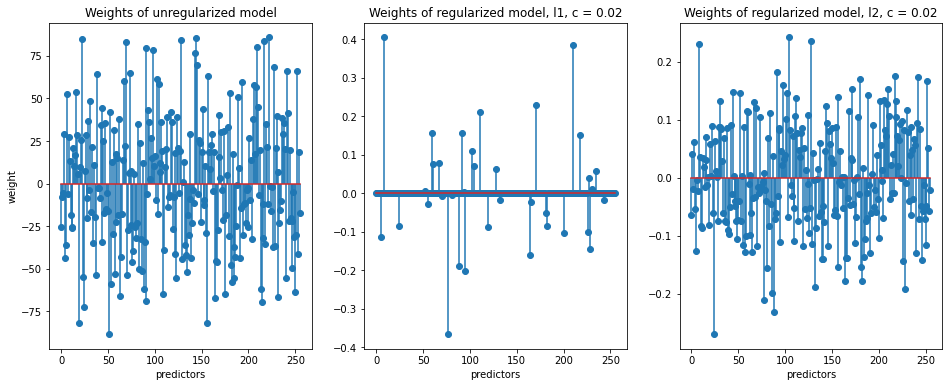

In [181]:
 #directly showing the weights of the 3 diffrent regularized models
fig, axes = plt.subplots(1, 3,sharey=False,figsize=(16,6))
axes[0].stem(logReg.coef_[0].flatten(), use_line_collection=True)
axes[0].set_title('Weights of unregularized model')
axes[0].set_ylabel('weight')
axes[0].set_xlabel('predictors')

axes[1].stem(scoresl1[2][0].coef_[0].flatten(), use_line_collection=True)
axes[1].set_title(f'Weights of regularized model, l1, c = {scoresl1[0][0]}')
axes[1].set_xlabel('predictors')

axes[2].stem(scoresl2[2][0].coef_[0].flatten(), use_line_collection=True)
axes[2].set_title(f'Weights of regularized model, l2, c = {scoresl2[0][0]}')
axes[2].set_xlabel('predictors')

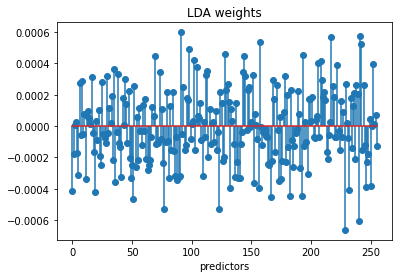

Accuracy Testset:  0.9166666666666666


In [182]:
#3.2.4 compute LDA weights
m0, m1, mdiff, w_lda = compute_lda_weights(X_train, y_train)

plt.stem(w_lda.flatten(), use_line_collection=True)
plt.title(f'LDA weights')
plt.xlabel('predictors')
plt.show()

# calculate LDA score
x0 = np.array(X_test[y_test==np.unique(y_test)[0]])
x1 = np.array(X_test[y_test==np.unique(y_test)[1]])
c = (w_lda * 1/2).reshape(len(w),).dot(x0.mean(axis=0)+x1.mean(axis=0))
correct = len((x0.dot(w_lda))[(x0.dot(w_lda))<=c]) + len((x1.dot(w_lda))[(x1.dot(w_lda))>c])
score = correct/len(y_test)
print('Accuracy Testset: ',score)


- LDA weights seem to be very small compared to other methods